Perform the following operations using Python by creating student performance dataset.
1. Display Missing Values
2. Replace missing values using any 2 suitable methods
3. Identify outliers using boxplot and scatterplot
4. Handle outlier using any technique
5. Perform any 2 data normalization technique

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('stu.csv')
df.head()

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20,35,Male
1,Emily Brown,102,5,68,Female
2,Michael Lee,103,6,78,Male
3,Emma Johnson,104,5,98,Female
4,William Davis,105,6,72,Male


In [11]:
df['Name'].replace({"a b" : "Rugved" }, inplace=True)
# Write the updated DataFrame back to the CSV file
df.to_csv('stu.csv', index=False)

In [5]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20,35,Male
1,Emily Brown,102,5,68,Female
2,Michael Lee,103,6,78,Male
3,Emma Johnson,104,5,98,Female
4,William Davis,105,6,72,Male
5,Olivia Wilson,106,5,81,Female
6,James Taylor,107,4,58,Male
7,Sophia Martinez,108,8,52,Female
8,Benjamin Anderson,109,3,20,Male
9,Ava Thomas,110,2,83,Female


In [7]:
# Change the 'FE Marks' of 'Rugved'
# df.loc[df['Name'] == 'Rugved', 'FE Marks'] = 100
df.loc[df['Name'] == 'Rugved', ['FE Marks', 'SE Marks']] = [np.nan, np.nan]
df.loc[df['Name'].isin(['Alexander Garcia','Daniel Martinez']),'SE Marks']=np.nan
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20.0,35.0,Male
1,Emily Brown,102,5.0,68.0,Female
2,Michael Lee,103,6.0,78.0,Male
3,Emma Johnson,104,5.0,98.0,Female
4,William Davis,105,6.0,72.0,Male
5,Olivia Wilson,106,5.0,81.0,Female
6,James Taylor,107,4.0,58.0,Male
7,Sophia Martinez,108,8.0,52.0,Female
8,Benjamin Anderson,109,3.0,20.0,Male
9,Ava Thomas,110,2.0,83.0,Female


In [8]:
#mising values
missing_values = df.isna().sum()

print("Missing values:")
print(missing_values)

Missing values:
Name           0
Roll Number    0
FE Marks       1
SE Marks       3
Gender         0
dtype: int64


In [9]:
#filling missing
df['FE Marks'].fillna(df['FE Marks'].median(), inplace=True)

In [10]:
df['SE Marks'].fillna(df['SE Marks'].mean(), inplace=True)

In [34]:
df

,Name,Roll Number,FE Marks,SE Marks,Gender
0,John Smith,101,20.0,35.000000,Male
1,Emily Brown,102,5.0,68.000000,Female
2,Michael Lee,103,6.0,78.000000,Male
3,Emma Johnson,104,5.0,98.000000,Female
4,William Davis,105,6.0,72.000000,Male
5,Olivia Wilson,106,5.0,81.000000,Female
6,James Taylor,107,4.0,58.000000,Male
7,Sophia Martinez,108,8.0,52.000000,Female
8,Benjamin Anderson,109,3.0,20.000000,Male
9,Ava Thomas,110,2.0,83.000000,Female


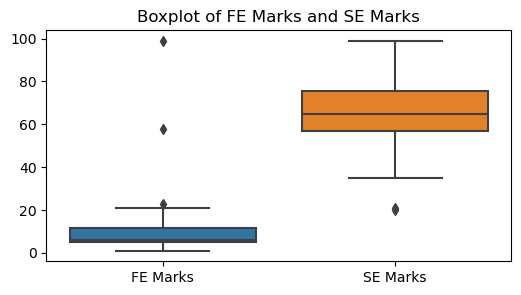

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
plt.figure(figsize=(6,3))
sns.boxplot(data = df[['FE Marks', 'SE Marks']])
plt.title('Boxplot of FE Marks and SE Marks')
plt.show()

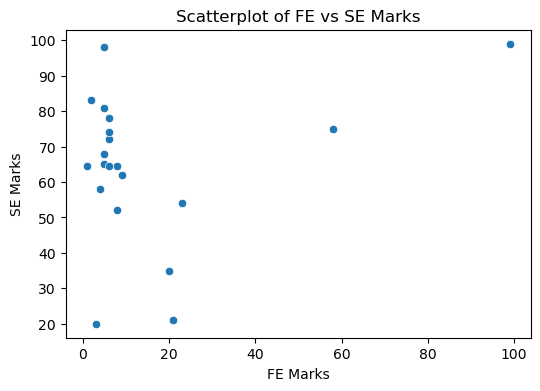

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='FE Marks', y='SE Marks', data = df)
plt.title('Scatterplot of FE vs SE Marks')
plt.show()